In [79]:
import pandas as pd
import numpy as np

from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from random import randint, choice, sample

import string

import names

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
%matplotlib inline

# Introduction

This notebook creates tables for Patients, Encounters, and Diagnosis Codes for Example Projects part 1 (Chapter 4) and Part 2 (Chapter 17).

## Patients

## Population 1

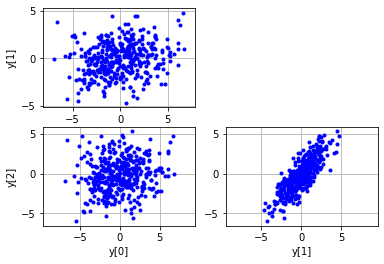

In [175]:
# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 400

# The desired covariance matrix.
# y0 = age
# y1 = num diagnoses
# y2 = visit duration (minutes)


r = np.array([
        [ 6.00, 0.75, 0.50],
        [ 0.75, 2.50, 2.50],
        [ 0.50, 2.50, 4.00]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

#
# Plot various projections of the samples.
#
subplot(2,2,1)
plot(y[0], y[1], 'b.')
ylabel('y[1]')
axis('equal')
grid(True)

subplot(2,2,3)
plot(y[0], y[2], 'b.')
xlabel('y[0]')
ylabel('y[2]')
axis('equal')
grid(True)

subplot(2,2,4)
plot(y[1], y[2], 'b.')
xlabel('y[1]')
axis('equal')
grid(True)

show()

In [176]:
# y0 = age
# y1 = num diagnoses
# y3 = visit duration (minutes)

ages_pop_1 = y[0] + 50
num_dx_pop_1 = y[1] + abs(y[1].min())
visit_minutes_pop_1 = y[2] + 30

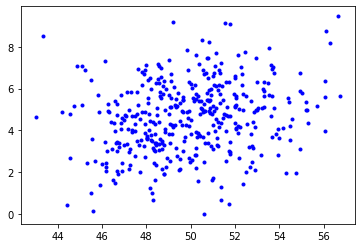

In [177]:
plot(ages_pop_1, num_dx_pop_1, 'b.')

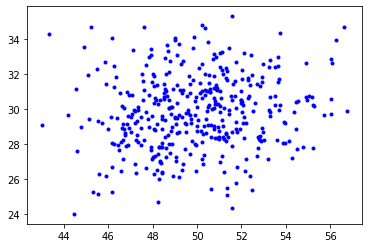

In [178]:
plot(ages_pop_1, visit_minutes_pop_1, 'b.')

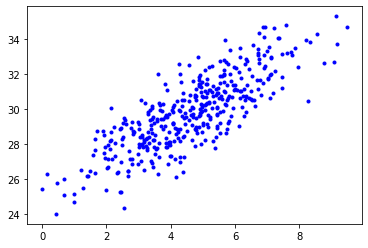

In [179]:
plot(num_dx_pop_1, visit_minutes_pop_1, 'b.')

## Population 2

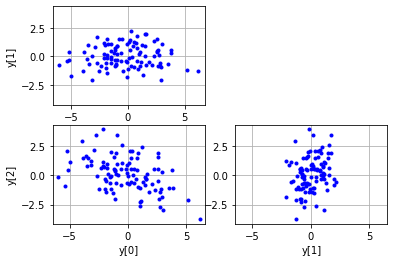

In [158]:
# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 100

# The desired covariance matrix.
# y0 = age
# y1 = num diagnoses
# y2 = visit duration (minutes)


r = np.array([
        [  6.00,  -2.5, -0.5],
        [ 0.0,  1.00,  0.50],
        [ -1.5,  0.50,  2.50]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

#
# Plot various projections of the samples.
#
subplot(2,2,1)
plot(y[0], y[1], 'b.')
ylabel('y[1]')
axis('equal')
grid(True)

subplot(2,2,3)
plot(y[0], y[2], 'b.')
xlabel('y[0]')
ylabel('y[2]')
axis('equal')
grid(True)

subplot(2,2,4)
plot(y[1], y[2], 'b.')
xlabel('y[1]')
axis('equal')
grid(True)

show()

In [159]:
ages_pop_2 = y[0] + abs(y[0].min())
num_dx_pop_2 = y[1] + abs(y[1].min())
visit_minutes_pop_2 = y[2] + 30

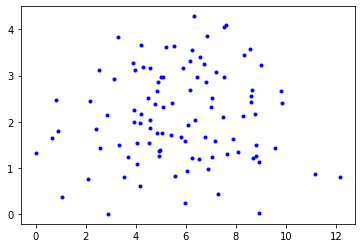

In [160]:
plot(ages_pop_2, num_dx_pop_2, 'b.')

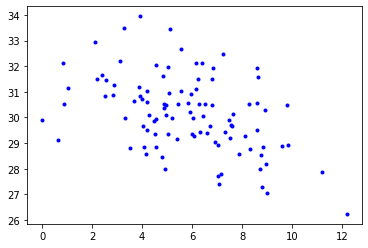

In [161]:
plot(ages_pop_2, visit_minutes_pop_2, 'b.')

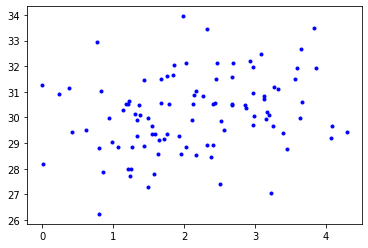

In [162]:
plot(num_dx_pop_2, visit_minutes_pop_2, 'b.')

## Build ML Table

In [180]:
patients_df = pd.DataFrame(data={'age':np.append(ages_pop_1,ages_pop_2).astype(int), 
                   'num_dx':np.append(num_dx_pop_1,num_dx_pop_2).astype(int), 
                   'visit_minutes':np.append(visit_minutes_pop_1,visit_minutes_pop_2).astype(int)})



###
# Nudge visit duration to adjust signal in ML model
###
def nudge_minutes(row):
    if row['num_dx']>=6:
        return row['visit_minutes'] + 5
    elif row['num_dx']<6:
        return row['visit_minutes'] - 1

patients_df['visit_minutes'] = patients_df.apply(lambda row: nudge_minutes(row), axis=1)


###
# Confuse length and num_dx in kids
###
def nudge_minutes_peds(row):
    if row['age']<=3:
        return row['visit_minutes'] + 20
    else:
        return row['visit_minutes']

patients_df['visit_minutes'] = patients_df.apply(lambda row: nudge_minutes_peds(row), axis=1)


###
# Add 'long' and 'short' visit labels
###
def label_duration(row):
    if row['visit_minutes'] <= 30:
        return 'short'
    elif row['visit_minutes'] > 30:
        return 'long'
    
patients_df['visit_class'] = patients_df.apply(lambda row: label_duration(row), axis=1)

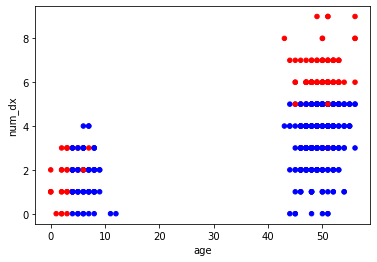

In [181]:
color_dict = {'long': '#FF0000', 'short': '#0000FF'}

#patients_df = patients_df[patients_df['age']>40]
patients_df.plot.scatter(x='age', y='num_dx', 
                         c=[color_dict[x] for x in patients_df['visit_class'].values])

In [182]:
#patients_df.to_csv('patients_ml_table.csv', index=False)

In [2]:
patients_df = pd.read_csv('patients_ml_table.csv')

# Build Wide Table

In [34]:
patients_df_expanded = patients_df.reset_index().rename(columns={'index':'patient_id'})

In [35]:
def generate_mrn():
    return(''.join([ str(randint(100000,999999)), choice(string.ascii_letters).upper()]))

patients_df_expanded['mrn'] = [generate_mrn() for i in patients_df_expanded['patient_id'].values]

In [36]:
patients_df_expanded['sex'] = [choice(['M','M','F','UNKNOWN']) for i in patients_df_expanded['patient_id'].values]

In [37]:
patients_df_expanded['location'] = [choice(['Northwood','Central City','Central City',
                                            'East Town Center','Country Regional']) 
                                    for i in patients_df_expanded['patient_id'].values]

In [38]:
second_visits = patients_df_expanded.sample(frac=0.25)
third_visits = second_visits.sample(frac=0.76)
fourth_visits = third_visits.sample(frac=0.85)


patients_df_expanded_dups = pd.concat([patients_df_expanded,
                                       second_visits, third_visits, fourth_visits]).sample(frac=1)

In [42]:
patients_df_expanded_dups['visit_id'] = [randint(10000,99999) for i in patients_df_expanded_dups['patient_id'].values]

In [50]:
provider_pool = [f"{names.get_last_name()}, {names.get_first_name()}" for i in range(11)]

clinics = [choice(['Northwood','Central City','Central City','East Town Center','Country Regional']) for i in range(11)]

provider_ids = [randint(1000,9999) for i in range(11)]

provider_df = pd.DataFrame(data={'provider_id':provider_ids,'provider_name':provider_pool, 'location':clinics})

location_dfs = []
for location in list(set(patients_df_expanded_dups['location'].values)):
    patients_df_expanded_dups_sub = patients_df_expanded_dups[patients_df_expanded_dups['location']==location]
    print(patients_df_expanded_dups_sub.shape)
    
    patients_df_expanded_dups_sub['provider_id'] = [choice(provider_df[provider_df['location']==location]['provider_id'].values) 
                                                    for i in patients_df_expanded_dups_sub['patient_id'].values]
    
    
    
    location_dfs.append(patients_df_expanded_dups_sub)

patients_df_expanded_dups_provider = pd.concat(location_dfs)

(168, 9)
(301, 9)


/Users/pmccaffrey/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(189, 9)
(143, 9)


In [110]:
provider_df = provider_df.drop('location', axis=1)
#provider_df.head()

,provider_id,provider_name
0,8617,"Pena, Robert"
1,4724,"Cutrona, Carl"
2,5392,"Merrill, Natalie"
3,6463,"Gebhardt, Patricia"
4,3718,"Beckstead, Johnny"


In [73]:
dates_set = pd.date_range(start=pd.to_datetime('2019-10-01'), end=pd.to_datetime('2019-12-31'), periods=None, freq='D')
patients_df_expanded_dups_provider['visit_date'] = (list(dates_set)*(int(len(patients_df_expanded_dups_provider)/len(dates_set))+1))[:len(patients_df_expanded_dups_provider)]

In [108]:
icd_10 = ['Z1231', 'I10', 'Z23', 'Z0000','E119','N390','M545','J069','Z01818','Z79899']

patient_id_sample = list(set(patients_df_expanded_dups_provider['patient_id'].values))

patient_icd = pd.DataFrame(data={'patient_id':patient_id_sample,
                   'icd_10_codes':[', '.join(sample(icd_10,randint(1,4))) for i in patient_id_sample]})


icd_split = patient_icd.merge(patient_icd['icd_10_codes'].str.split(",", expand=True).reset_index().rename(columns={'index':'patient_id'}), 
                  on='patient_id', how='inner').drop('icd_10_codes', axis=1)

icd_melt = pd.melt(icd_split, id_vars=['patient_id'], value_vars=[0,1,2,3]).drop('variable',axis=1)

patient_id_icd = icd_melt[pd.notna(icd_melt['value'])].rename(columns={'value':'icd_10_code'})

#patient_id_icd.head(3)

,patient_id,icd_10_code
0,0,E119
1,1,J069
2,2,Z79899


# Break Wide Table into Smaller Tables

In [123]:
patients_df_expanded_dups_provider.head(4)

,patient_id,age,num_dx,visit_minutes,visit_class,mrn,sex,location,visit_id,provider_id,visit_date
280,280,49,4,28,short,856346I,UNKNOWN,Country Regional,57734,8551,2019-10-01
294,294,50,6,37,long,322136W,UNKNOWN,Country Regional,22435,5392,2019-10-02
148,148,51,6,36,long,159262O,F,Country Regional,99589,5392,2019-10-03
381,381,53,3,27,short,596361A,M,Country Regional,31765,8551,2019-10-04


In [126]:
patient_demographics = patients_df_expanded_dups_provider[['patient_id','age','sex','mrn']]
visit_data = patients_df_expanded_dups_provider[['visit_id','patient_id','visit_date','provider_id','location']]

In [119]:
provider_df.head(3)

,provider_id,provider_name
0,8617,"Pena, Robert"
1,4724,"Cutrona, Carl"
2,5392,"Merrill, Natalie"


In [120]:
patient_id_icd.head(3)

,patient_id,icd_10_code
0,0,E119
1,1,J069
2,2,Z79899


In [121]:
patient_demographics.head(3)

,patient_id,age,sex,mrn
280,280,49,UNKNOWN,856346I
294,294,50,UNKNOWN,322136W
148,148,51,F,159262O


In [122]:
visit_data.head(3)

,visit_id,patient_id,visit_date,provider_id
280,57734,280,2019-10-01,8551
294,22435,294,2019-10-02,5392
148,99589,148,2019-10-03,5392


In [130]:
provider_df.to_csv('provider_table.csv', index=False)

patient_id_icd.to_csv('patient_diagnoses_table.csv', index=False)

patient_demographics.groupby('patient_id').max().reset_index().to_csv(
    'patient_demographics_table.csv', index=False)

visit_data.groupby('visit_id').max().reset_index().to_csv(
    'visit_data_table.csv', index=False)